C:\Users\agnes\AppData\Local\Temp\ipykernel_21852\3949980285.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../dataset/rossmann-store-sales/train.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        842152 non-null  float64     

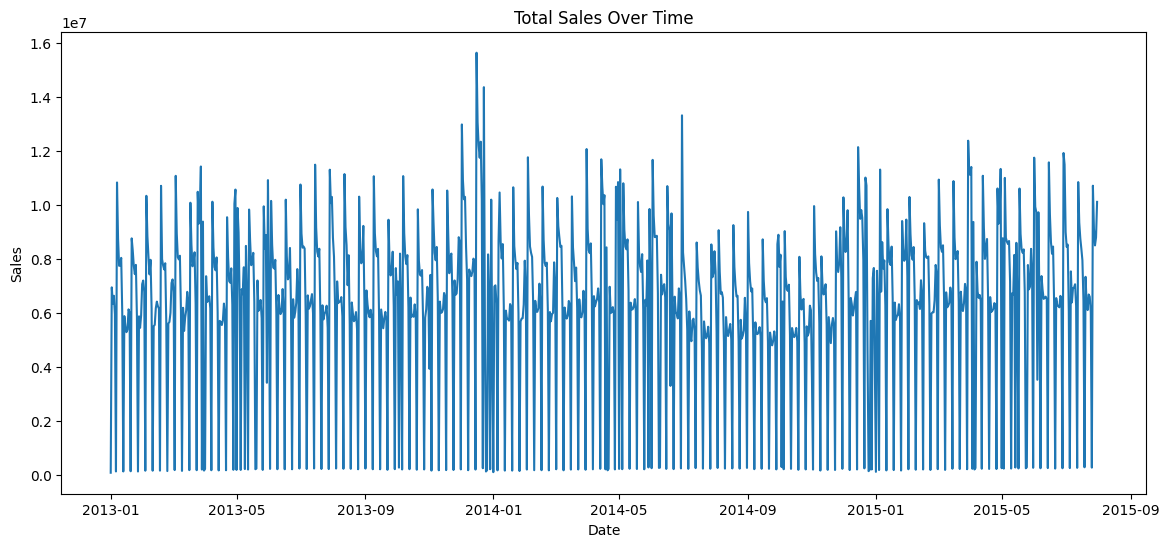

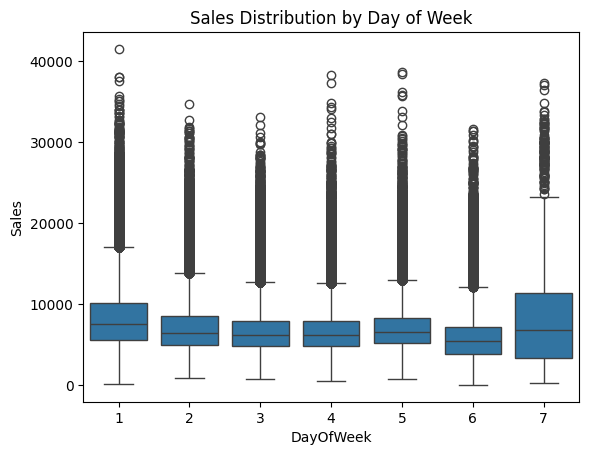

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = pd.read_csv('../dataset/rossmann-store-sales/train.csv')
store = pd.read_csv('../dataset/rossmann-store-sales/store.csv')

df = pd.merge(train, store, on='Store', how='left')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Open'] == 1]  # only open stores
df = df[df['Sales'] > 0]  # remove days with zero sales

df.info()
df.head()

plt.figure(figsize=(14,6))
plt.plot(df.groupby('Date')['Sales'].sum())
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title("Sales Distribution by Day of Week")
plt.show()

